# Polynomial regression - overfitting and underfitting

In [8]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
samples = 100
X = np.random.uniform(-3,3, (samples,1))

f = lambda x: x**2 + 0.5*x + 3
y = f(X) + np.random.randn(samples,1)

f(X).shape, X.shape

((100, 1), (100, 1))

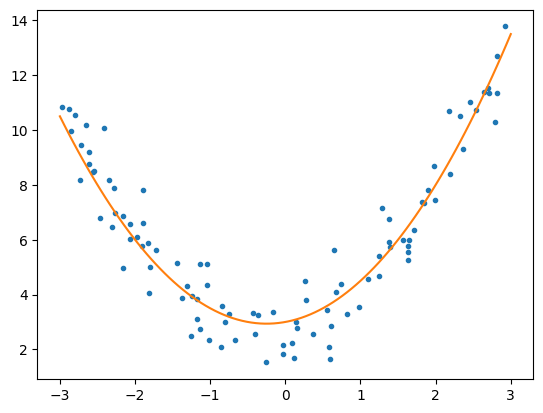

In [9]:

x = np.linspace(-3,3,100).reshape(100,1)

plt.plot(X, y, '.')
plt.plot(x, f(x))


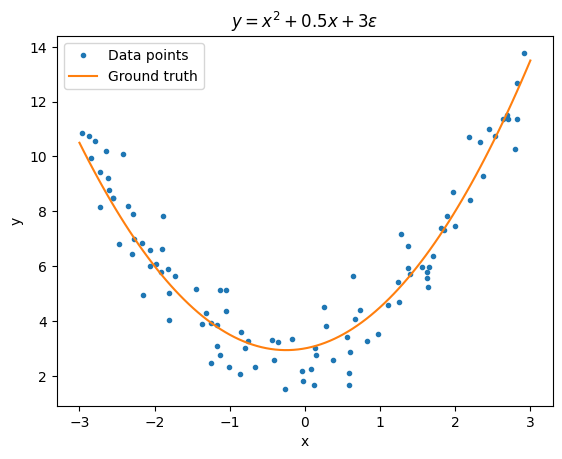

In [13]:
def draw_data():
    fig, ax = plt.figure(), plt.axes()
    ax.plot(X,y, '.', label="Data points")
    x = np.linspace(-3,3,samples).reshape(-1,1)
    ax.plot(x, f(x), label="Ground truth")
    ax.set(title= r"$y = x^2+0.5x+3\epsilon$", xlabel="x", ylabel="y")
    ax.legend()

    return ax

draw_data();


## Polynomial regression

In [18]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_instance = PolynomialFeatures(degree=2, include_bias=False)

polynomial_features = polynomial_instance.fit_transform(X) 
polynomial_features[:5], X[:5]

(array([[-0.75275929,  0.56664654],
        [ 2.70428584,  7.3131619 ],
        [ 1.39196365,  1.93756281],
        [ 0.59195091,  0.35040587],
        [-2.06388816,  4.25963433]]),
 array([[-0.75275929],
        [ 2.70428584],
        [ 1.39196365],
        [ 0.59195091],
        [-2.06388816]]))

In [19]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(polynomial_features, y)
model.coef_

array([[0.43366893, 1.06456263]])

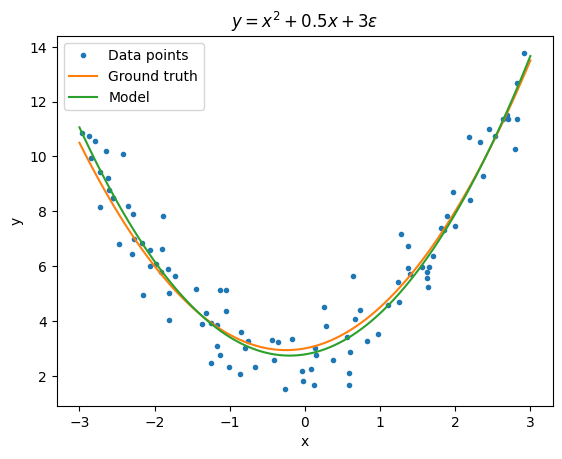

In [21]:
x = np.linspace(-3,3, samples).reshape(-1,1)
x_polynomial_features = polynomial_instance.transform(x)

y_pred = model.predict(x_polynomial_features)

ax = draw_data()
ax.plot(x, y_pred, label = "Model")
ax.legend()